#### The purpose of this analysis cancellations in hotels, whether resorts or city hotels,to help devise new methods to reduce the consequent losses.
#### the results allow hotel managers to improve cancellation policies, define better overbooking tactics
 

#### Content

Data Exploration

Data Pre-Processing

Data Visualization

### Data Exploration

#### Lets import the necessary libs and load the dataet.

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
# Read the csv file
hotel_booking_data =pd.read_csv('../DataSet/hotel_bookings.csv')

In [46]:
hotel_booking_data.shape

(119390, 32)

In [47]:
hotel_booking_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [48]:
hotel_booking_data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [49]:
hotel_booking_data.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1949,Resort Hotel,1,6,2015,September,39,23,0,2,1,...,No Deposit,156.0,NaN,0,Transient,0.00,0,1,Canceled,2015-09-22
31309,Resort Hotel,0,55,2016,December,52,19,1,3,2,...,No Deposit,6.0,NaN,0,Transient,30.60,0,0,Check-Out,2016-12-23
8942,Resort Hotel,1,124,2016,October,43,21,0,2,2,...,No Deposit,241.0,NaN,0,Transient,92.40,0,2,No-Show,2016-10-21
117418,City Hotel,0,129,2017,August,31,3,0,1,2,...,No Deposit,7.0,NaN,0,Transient,90.00,0,1,Check-Out,2017-08-04
54041,City Hotel,1,245,2016,July,28,6,2,4,1,...,Non Refund,19.0,NaN,0,Transient,110.00,0,0,Canceled,2016-02-23
46460,City Hotel,1,150,2016,January,1,2,2,1,2,...,Non Refund,21.0,NaN,91,Transient,101.00,0,0,Canceled,2015-11-04
79708,City Hotel,0,14,2015,October,44,30,1,2,2,...,No Deposit,83.0,NaN,0,Transient,98.67,0,1,Check-Out,2015-11-02
82822,City Hotel,1,68,2016,February,8,17,0,2,2,...,Non Refund,37.0,NaN,0,Transient,75.00,0,0,Canceled,2016-01-06
98735,City Hotel,0,29,2016,September,40,30,2,2,3,...,No Deposit,7.0,NaN,0,Transient,150.61,0,1,Check-Out,2016-10-04
3363,Resort Hotel,0,45,2015,December,49,5,2,1,2,...,No Deposit,38.0,NaN,0,Transient-Party,68.00,0,0,Check-Out,2015-12-08


In [50]:
hotel_booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [51]:
hotel_booking_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Data Preprocessing

#### Rename the columns

In [52]:
# Rename the columns to be more readable
hotel_booking_data.rename(columns={'adr': 'average_daily_rate'},inplace=True)
hotel_booking_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### There is feature that won't be relevant in our analysis so we will drop it

In [53]:
# drop company column
hotel_booking_data.drop('company',axis='columns', inplace=True);

In [54]:
#check the number of columns after drop company column
hotel_booking_data.shape

(119390, 31)

#### Check if there are NULL value and sum them

In [55]:
hotel_booking_data.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


#### after check, we found some NULL value should drop it 

In [56]:
# drop Null rows 
hotel_booking_data.dropna(inplace=True)

#### check if stell we have any missnig value

In [57]:
hotel_booking_data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
average_daily_rate                0
required_car_parking_spaces 

#### Now is cleaner

#### To show if we have duplicates

In [58]:
hotel_booking_data.duplicated().sum()

27823

#### we have a lot of duplicates should drop it 

In [59]:
# drop the duplicates
hotel_booking_data = hotel_booking_data.drop_duplicates()

check after drop the duplicates

In [60]:
hotel_booking_data.duplicated().sum()

0

#### Check if we have any negative value

In [61]:
hotel_booking_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests
count,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000,75071.000000
mean,0.299210,86.921981,2016.225520,26.919716,15.797818,1.070253,2.751036,1.924591,0.148899,0.010510,0.014626,0.019688,0.032889,0.248218,93.932784,0.810273,110.199214,0.072145,0.739420
std,0.457915,85.956707,0.682752,13.363077,8.845078,1.032607,2.042798,0.519041,0.471509,0.113361,0.120052,0.316184,0.509008,0.698098,113.111819,10.573899,54.386522,0.260218,0.832634
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,76.000000,0.000000,0.000000
50%,0.000000,59.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,101.600000,0.000000,1.000000
75%,1.000000,134.000000,2017.000000,37.000000,24.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,136.810000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000


#### to remove negative value from average_daily_rate

In [62]:
hotel_booking_data.drop(hotel_booking_data[hotel_booking_data.average_daily_rate<1.0].index,inplace=True)

In [63]:
hotel_booking_data.shape

(74178, 31)

### Data Visualization

In [64]:
# Show the type of hotel
hotel_booking_data.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [65]:
hotel_booking_data['hotel'].value_counts()

City Hotel      47327
Resort Hotel    26851
Name: hotel, dtype: int64

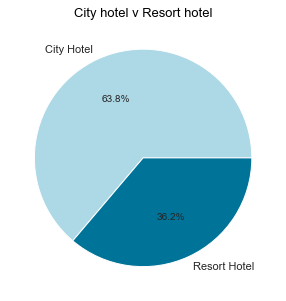

In [66]:
labels = hotel_booking_data.hotel.value_counts().index
sizes = hotel_booking_data.hotel.value_counts()
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors = ['#ADD8E6','#007399'])
plt.title('City hotel v Resort hotel',color = 'black',fontsize = 13);

#### City hotel is more than resort hotel

 One third of the hotels are resort hotels.
 
#### The reason could be that:

Tere are more city hotels than resort hotels.

City Hotel are normally cheaper.
 
There are more demand for city hotels than resort hotels.

#### compare the cancelings between two hotels.

#### Which type of hotel has the highest number of cancellations?

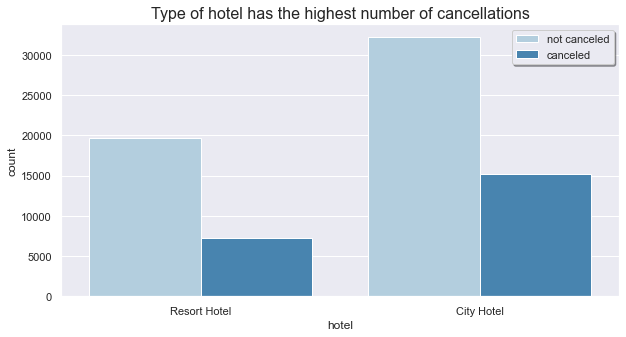

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(data=hotel_booking_data, x = 'hotel',hue='is_canceled',palette='Blues')
plt.title("Type of hotel has the highest number of cancellations",fontsize=16)
plt.legend(['not canceled','canceled'],shadow = True, loc = 0)
plt.show()




#### The above figure shows the absolute amount of the canceled order of the city hotel and the resort hotel. The big difference does not tell us much information, since the city hotel has overall much more orders. Only the cancellation rate matters.


In [68]:
# Now we compare the cancel rate of the city hotel and the resort hotel
can_rate = hotel_booking_data.groupby(["hotel","is_canceled"]).size().reset_index(name='rate')
summe = can_rate.groupby("hotel")['rate'].transform("sum")
can_rate['rate'] = can_rate['rate'].div(summe)
can_rate

,hotel,is_canceled,rate
0,City Hotel,0,0.679549
1,City Hotel,1,0.320451
2,Resort Hotel,0,0.731146
3,Resort Hotel,1,0.268854


#### From the above analysis we can see that the city hotel has a much higher cancellation rate. However, if we only look at the guests who had canceled before, the guests of resort hotel has more cancellations.

 #### Customers with the history of cancellation

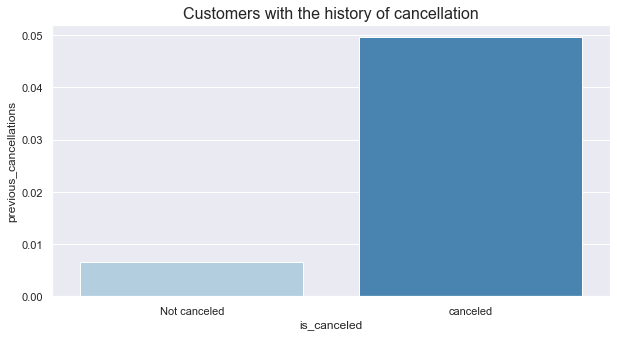

In [69]:
ngroup= hotel_booking_data.groupby('is_canceled', as_index= False)[['previous_cancellations']].mean()
plt.figure(figsize=(10,5))
plt.title("Customers with the history of cancellation",fontsize=16)
history_of_cancellation=sns.barplot(data=ngroup, x=ngroup['is_canceled'], y=ngroup['previous_cancellations'], palette='Blues')
history_of_cancellation.set_xticklabels(['Not canceled','canceled']);

#### Customers with the history of cancellation tend to cancel more often.
#### Interestingly repeated guests tend to cancel more!

#### Now let's see the cancelations across customer types

In [70]:
hotel_resort_data = hotel_booking_data[hotel_booking_data['hotel'] == 'Resort Hotel']
hotel_city_data = hotel_booking_data[hotel_booking_data['hotel'] == 'City Hotel']

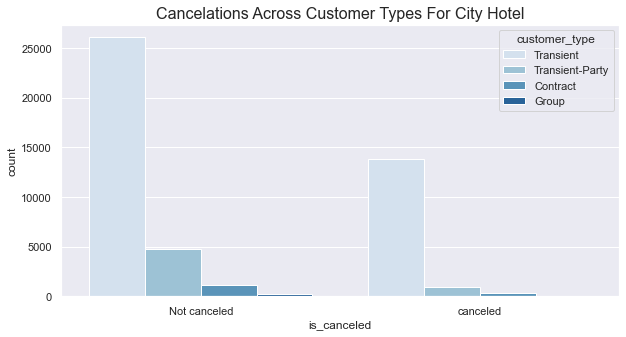

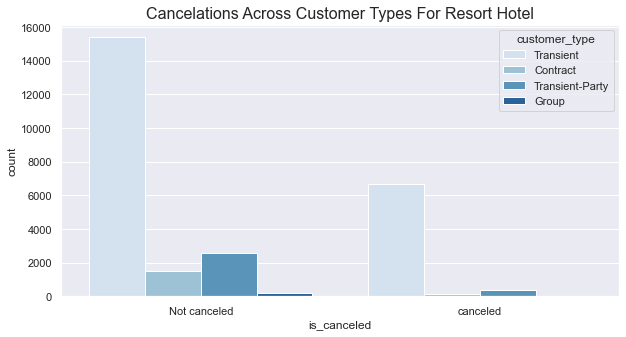

In [71]:
# Cancelation across city hotel for each customer type
plt.figure(figsize=(10,5))
city_hotel=sns.countplot(data=hotel_city_data, x='is_canceled', hue='customer_type', palette='Blues')
plt.title('Cancelations Across Customer Types For City Hotel', fontdict={'fontsize':16})
city_hotel.set_xticklabels(['Not canceled','canceled'])

plt.show()


# Cancelation across resort hotel for each customer type
plt.figure(figsize=(10,5))
resort_hotel=sns.countplot(data=hotel_resort_data, x='is_canceled', hue='customer_type',palette='Blues')
plt.title('Cancelations Across Customer Types For Resort Hotel', fontdict={'fontsize':16})
resort_hotel.set_xticklabels(['Not canceled','canceled'])

plt.show()

#### For City Hotel the pattern observed for canceled bookings and confirmed bookings (Not Canceled) is same. No cancelations can be observed across Contract and Group category in Resort Hotel.

#### Show if more days in waiting list lead more cancelation?

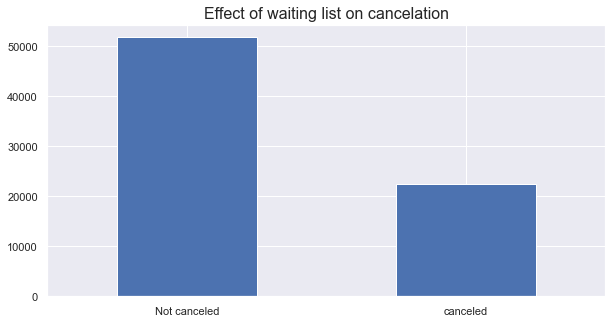

In [72]:
plt.figure(figsize=(10,5))
hotel_booking_data['is_canceled'].value_counts().plot(kind="bar",rot=0)
plt.title('Effect of waiting list on cancelation', fontdict={'fontsize':16})
ticks_x = np.linspace(0, 1,2)
is_canceled = ['Not canceled','canceled']
plt.xticks(ticks_x, is_canceled);

#### So, more days in waiting list,is no reason to more cancel

#### The relation between deposit type and cancelations.

In [73]:
#group data for deposit_type:
deposit_cancel_data = hotel_booking_data.groupby("deposit_type")["is_canceled"].describe()
deposit_cancel_data

,count,mean,std,min,25%,50%,75%,max
deposit_type,,,,,,,,
No Deposit,73297.0,0.293887,0.455544,0.0,0.0,0.0,1.0,1.0
Non Refund,845.0,0.975148,0.155766,0.0,1.0,1.0,1.0,1.0
Refundable,36.0,0.555556,0.503953,0.0,0.0,1.0,1.0,1.0


In [74]:
hotel_booking_data['deposit_type'].value_counts()

No Deposit    73297
Non Refund      845
Refundable       36
Name: deposit_type, dtype: int64

#### NO Deposit is more cancellation , let's show it in visualization

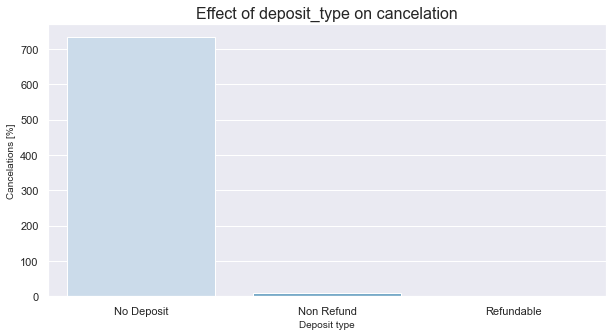

In [75]:
plt.figure(figsize=(10, 5))
sns.barplot(x= deposit_cancel_data.index, y= deposit_cancel_data["count"]/100 ,palette='Blues')
plt.title("Effect of deposit_type on cancelation",fontsize=16)
plt.xlabel("Deposit type", fontsize=10)
plt.ylabel("Cancelations [%]",fontsize=10)
plt.show()

#### Over 99% of people how No deposit have canceled their hotel bookings

#### let's see the relations of special request with cancelation.

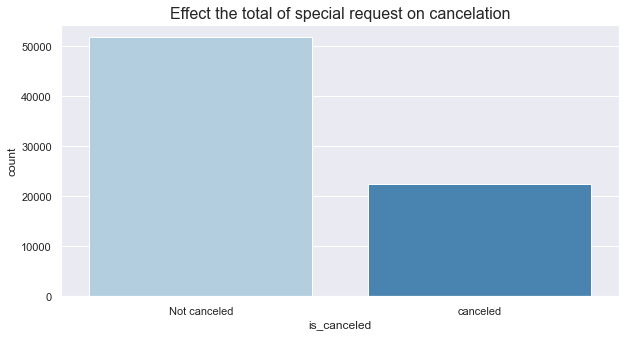

In [76]:
plt.figure(figsize=(10, 5))
plt.title("Effect the total of special request on cancelation",fontsize=16)
total_of_special=sns.countplot(data=hotel_booking_data,x='is_canceled', palette='Blues')
total_of_special.set_xticklabels(['Not canceled','canceled']);

#### So total of special request it's has some effect on cancelation

#### Cancelation across months for City Hotel and Resort Hotel

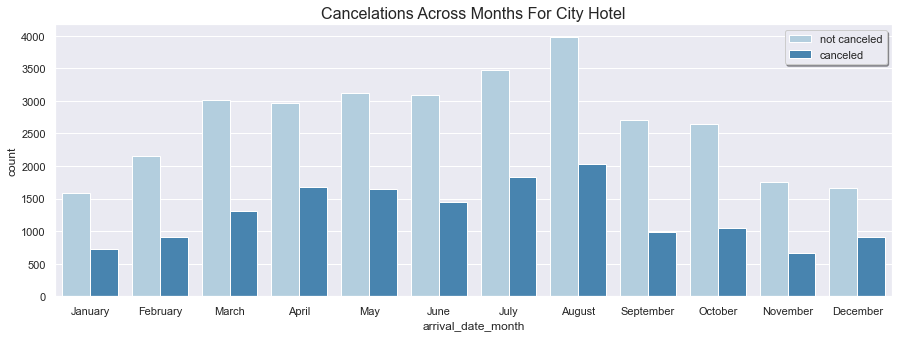

In [77]:
plt.figure(figsize=(15,5))
sns.countplot(data=hotel_city_data, x = 'arrival_date_month',hue='is_canceled',palette='Blues',order=["January","February","March","April","May","June","July","August","September","October","November","December"])
plt.title("Cancelations Across Months For City Hotel",fontsize=16)
plt.legend(['not canceled','canceled'],shadow = True, loc = 0)
plt.show()

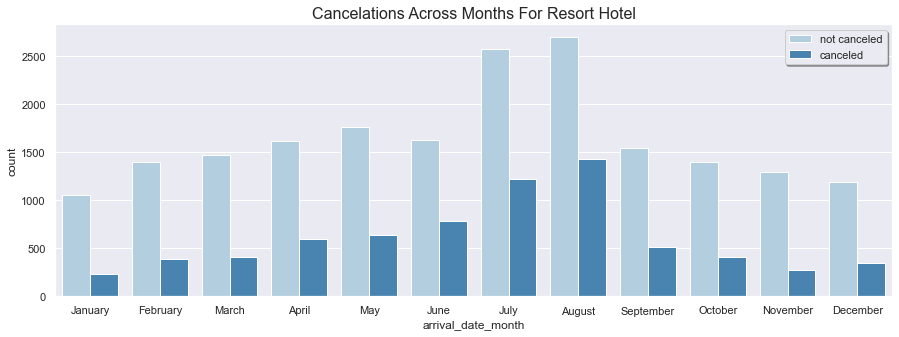

In [78]:
plt.figure(figsize=(15,5))
sns.countplot(data=hotel_resort_data, x = 'arrival_date_month',hue='is_canceled',palette='Blues',order=["January","February","March","April","May","June","July","August","September","October","November","December"])
plt.title("Cancelations Across Months For Resort Hotel",fontsize=16)
plt.legend(['not canceled','canceled'],shadow = True, loc = 0)
plt.show()

#### Effect of lead time on cancelation

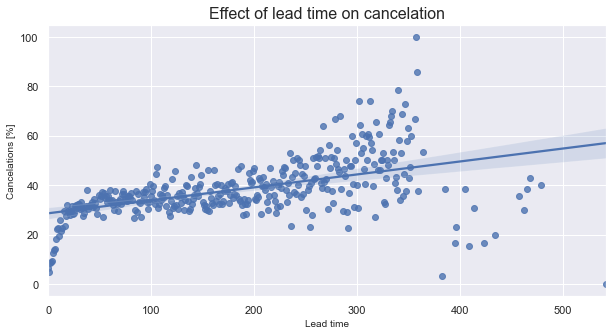

In [79]:
# group data for lead_time:
lead_cancel_data = hotel_booking_data.groupby("lead_time")["is_canceled"].describe()

# use only lead_times with more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
plt.figure(figsize=(10,5))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time",fontsize=10)
plt.ylabel("Cancelations [%]", fontsize=10)
# plt.xlim(0,365)
plt.show()


#### Bookings made a few days before the arrival date are rarely canceled, whereas bookings made over one year in advance are canceled very often.

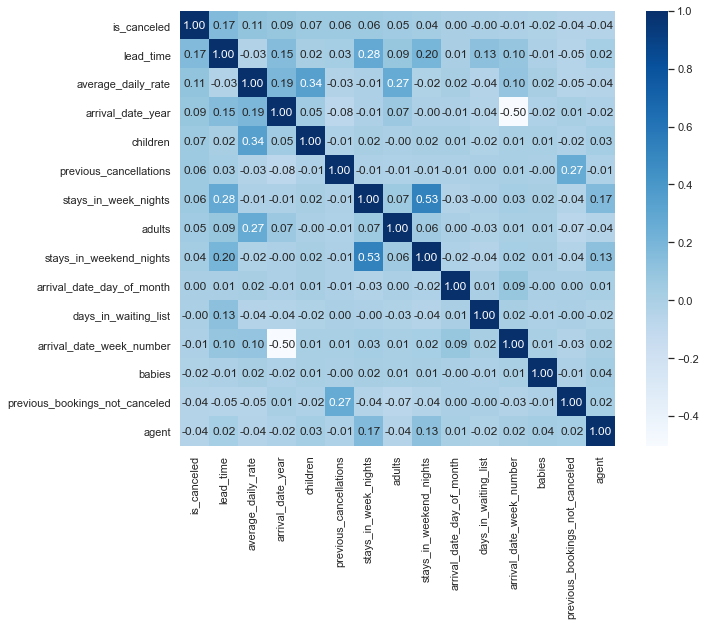

In [80]:
a = hotel_booking_data.corr()
plt.figure(figsize=(11, 8))
k = 15
cols = a.nlargest(k,'is_canceled')['is_canceled'].index
cm = np.corrcoef(hotel_booking_data[cols].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values,xticklabels=cols.values,cmap="Blues")
plt.show()

#### With these lists, we can conclude that reservation status date plays a huge role whether a guest cancels or not.

#### We can see as we get close to the end of the year, cancelations tend to decrease after a sudden rise in July. (which could be an account for the summer travels)

